In [2]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel


Business problem:
Our goal is to build a machine learning model that is able to make predictions about the average occupancy rate of homes in the Boston region, USA, by homeowners. The variable to be predicted is a numerical value that represents the median occupancy rate for homes in Boston. For each house, we have several explanatory variables.

We will use the Boston Housing Dataset, which is a dataset that has the average occupancy rate of homes, along with 13 other variables that may be related to home prices. These are factors like socioeconomic conditions, environmental conditions, educational facilities, and some other similar factors. There are 506 observations in the data for 14 variables. There are 12 numeric variables in our dataset and 1 categorical variable. The objective of this project is to build a linear regression model to estimate the average occupancy rate of homes by homeowners in Boston.

Links:
[1]: https://www.portalsaofrancisco.com.br/quimica/oxido-nitrico

In [3]:
# Let's load the dataset
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

/home/nilton/anaconda3/envs/Jedi/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

In [5]:
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)

In [6]:
dataset['target'] = boston.target

In [7]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Dataset Description

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-residential acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per 10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. TARGET: Median value of owner-occupied homes in $1000's

# Cleaning data

In [8]:
# Verifying if there is null values by column
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [41]:
# ok. There isn't. Now we can go further.

# Exploratory Analysis

In [9]:
# Verifying correlation with the target.
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


As we can see, all variables has considerable correlation with the target. Let's see between the predictors

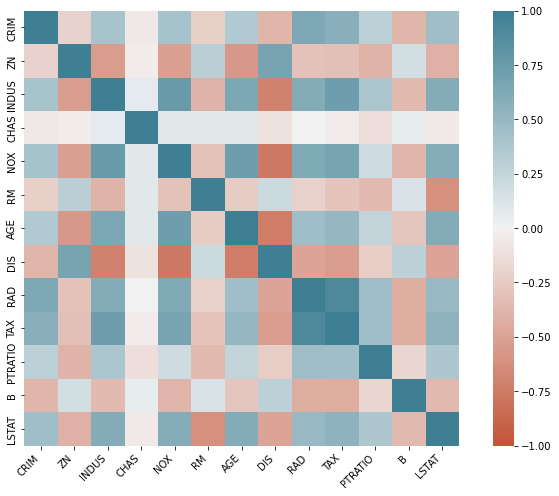

In [10]:
Correlation = dataset.iloc[:,:-1].corr() # Except the target

plt.figure(figsize=(12,8))
corr_map = sns.heatmap(
Correlation,
vmin = -1,
vmax = 1,
cmap = sns.diverging_palette(20,220, n = 400),
center = 0,
square = True)

corr_map.set_xticklabels(
corr_map.get_xticklabels(),
rotation = 45, horizontalalignment = 'right')
plt.savefig('Correlation.png')

In [44]:
# Let's take a look at those high correlated!

In [11]:
high_correlated = []
for i in Correlation.columns:
    for j in Correlation.columns:
        if i != j:
            if (Correlation[i][j] >= 0.7 or Correlation[i][j] <= -0.7) and (i,j) not in high_correlated and (j,i) not in high_correlated:
                high_correlated.append((i,j))

In [12]:
high_correlated

[('INDUS', 'NOX'),
 ('INDUS', 'DIS'),
 ('INDUS', 'TAX'),
 ('NOX', 'AGE'),
 ('NOX', 'DIS'),
 ('AGE', 'DIS'),
 ('RAD', 'TAX')]

In [13]:
# This the first set of correlated data to be seen.
df1 = dataset[['INDUS', 'NOX', 'TAX', 'DIS']]

In [14]:
df1.head()

,INDUS,NOX,TAX,DIS
0,2.31,0.538,296.0,4.0900
1,7.07,0.469,242.0,4.9671
2,7.07,0.469,242.0,4.9671
3,2.18,0.458,222.0,6.0622
4,2.18,0.458,222.0,6.0622


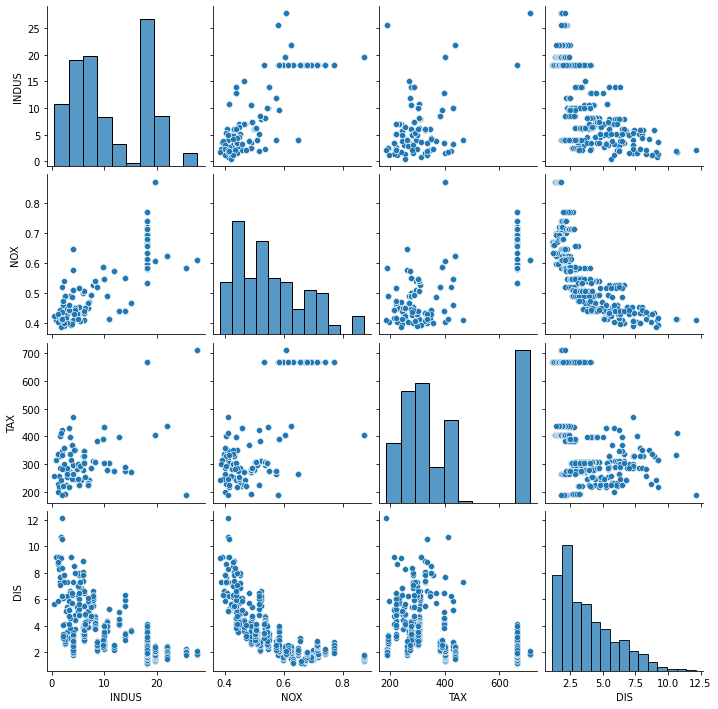

In [15]:
sns.pairplot(df1)

In [16]:
df1.corr()

,INDUS,NOX,TAX,DIS
INDUS,1.000000,0.763651,0.720760,-0.708027
NOX,0.763651,1.000000,0.668023,-0.769230
TAX,0.720760,0.668023,1.000000,-0.534432
DIS,-0.708027,-0.769230,-0.534432,1.000000


We can see high correlation between industrial zone (INDUS), area of employment (DIS), polluent gas NOX, and the full-value property-tax rate per 10,000 (TAX). When the house is near of city centre, it tends to be expensive. Industrial area is highly correlated with nitric Oxide concentration. Nitric oxide is a colorless gas. It is also known as nitrogen monoxide and has the chemical formula NO. It is considered an air pollutant responsible for the depletion of the ozone layer. Nitric oxide reacts with oxygen (O2) and ozone (O3) to form nitrogen dioxide (NO2), a brown smoke and an environmental pollutant. Nitric oxide generated from car engines, industries, and power plants is the cause of acid rain and air pollution[1]. The more the distance from city centre, the less is NO, which means, negative correlation. I can also see asymmetric distributions.

In [17]:
df1.skew()

INDUS    0.295022
NOX      0.729308
TAX      0.669956
DIS      1.011781
dtype: float64

By the results above, we get asymmetric positive distributions. So the data is biased.

In [18]:
df2 = dataset[['RAD', 'TAX']]

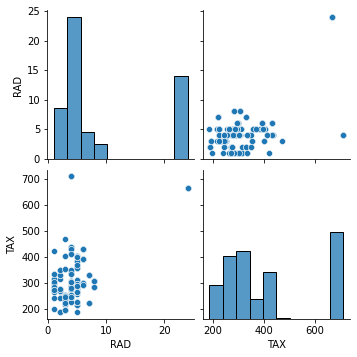

In [19]:
sns.pairplot(df2)

In [20]:
df2.corr()

,RAD,TAX
RAD,1.000000,0.910228
TAX,0.910228,1.000000


As we can see, the accessibility to highways and the taxes are highly correlated. So far, we have found that the predictor variables are strongly correlated, which can cause colinearity. If we put all the variables in the machine learning model, the model struggles to get the impact of multicolinear variables on the target variable.

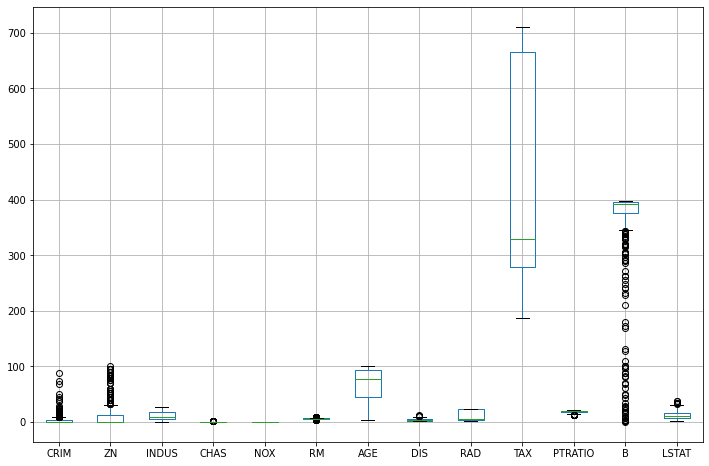

In [21]:
# Looking for outliers 
plt.figure(figsize=(12,8))
dataset.iloc[:,:-1].boxplot()
plt.savefig('boxold.png')

The boxplot indicates the necessity of replacing or remove outliers.

# Preprocessing

In [22]:
# Replacing outliers:
'''
Formula:
Q1 - 1.5*IQR
q3 + 1.5*IQR
'''
def replace_outliers(dataset):
    data = dataset.copy()
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    IQR = q3 - q1
    for i in range(0, len(data)):
        if data[i] < q1 - 1.5*IQR:
            data.iat[i] = np.mean(data)
        elif data[i] > q3 + 1.5*IQR:
            data.iat[i] = np.mean(data)
    return data
            

In [23]:
dataset2 = dataset.copy()
for i in dataset2.columns:
    if i != 'target':
        dataset2[i] = replace_outliers(dataset2[i])

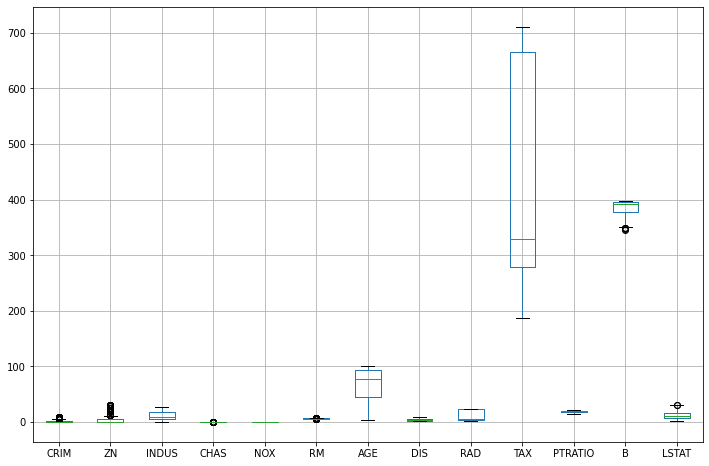

In [24]:
# Checking the outliers 
plt.figure(figsize=(12,8))
dataset2.iloc[:,:-1].boxplot()
plt.savefig('boxafter.png')

In [25]:
dataset3 = dataset2.copy()

In [26]:
## Now, it's time to split the dataset between train and test
previsores = dataset3.iloc[:,:-1]

In [27]:
previsores

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [28]:
target = dataset3.iloc[:,-1:]

In [29]:
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
# Now we have to normalize them in order to get a fair analysis of importance by the model

In [30]:
n_previsores = MinMaxScaler()

In [31]:
n_target = MinMaxScaler()

In [32]:
previsores_normalized = n_previsores.fit_transform(previsores)

In [33]:
target_normalized = n_target.fit_transform(target)

In [34]:
target_normalized.shape

(506, 1)

In [35]:
previsores_normalized.shape

(506, 13)

In [36]:
previsores_normalized

array([[0.        , 0.6       , 0.06781525, ..., 0.20238095, 1.        ,
        0.11176066],
       [0.00233829, 0.        , 0.24230205, ..., 0.5       , 1.        ,
        0.25481431],
       [0.00233606, 0.        , 0.24230205, ..., 0.5       , 0.92171571,
        0.07909216],
       ...,
       [0.00606463, 0.        , 0.42045455, ..., 0.88095238, 1.        ,
        0.13445667],
       [0.0115043 , 0.        , 0.42045455, ..., 0.88095238, 0.93364108,
        0.1633425 ],
       [0.00457744, 0.        , 0.42045455, ..., 0.88095238, 1.        ,
        0.21148556]])

In [ ]:
# Time for splitting the data

In [48]:
X_train,X_test, Y_train, Y_test = train_test_split(previsores_normalized, target_normalized, test_size = 0.3, random_state=42)

In [49]:
len(Y_test)

152

In [50]:
len(X_test)

152

In [51]:
len(X_train)

354

In [52]:
len(Y_train)

354

# Modelling our Machine Learning!

In [53]:
modelo = LinearRegression(normalize = False)

In [54]:
modelo.fit(X_train, Y_train)

/home/nilton/anaconda3/envs/Jedi/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


LinearRegression(normalize=False)

In [55]:
r2_score(Y_test, modelo.predict(X_test))

0.6283240547507232

Using all variables we have 0.63 of R_squared. Let's see how can we improve using Feature Selection with random_forest



# Improving the model

In [56]:
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, Y_train)

/home/nilton/anaconda3/envs/Jedi/lib/python3.7/site-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestRegressor())

In [57]:
## Let's see the variables it has chosen.
sel.get_support()

array([False, False, False, False, False,  True, False, False, False,
       False, False, False,  True])

It picked up only 2 variables. RM and LSTAT

In [58]:
sel.get_feature_names_out()

array(['x5', 'x12'], dtype=object)

In [61]:
X_train = X_train[:,[5,12]]

In [62]:
X_test = X_test[:,[5,12]]

In [63]:
modelo_v2 = LinearRegression(normalize = False)

In [64]:
modelo_v2.fit(X_train, Y_train)

/home/nilton/anaconda3/envs/Jedi/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


LinearRegression(normalize=False)

# Evaluation

In [65]:
r2_score(Y_test, modelo_v2.predict(X_test))

0.49890641374149547

Worse than the previous one. We must put more variables into our model. Let's try other methods to feature selection

# Keep Improving!

In [66]:
X_train,X_test, Y_train, Y_test = train_test_split(previsores_normalized, target_normalized, test_size = 0.3, random_state=42)

In [67]:
forest = RandomForestRegressor(n_estimators = 100)

In [68]:
forest.fit(X_train, Y_train)

/home/nilton/anaconda3/envs/Jedi/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [69]:
forest.feature_importances_

array([0.02802811, 0.00656766, 0.0108528 , 0.00238399, 0.04184235,
       0.08427668, 0.02701224, 0.06692685, 0.00382975, 0.01638115,
       0.01559253, 0.0162831 , 0.6800228 ])

In [70]:
np.sort(forest.feature_importances_)

array([0.00238399, 0.00382975, 0.00656766, 0.0108528 , 0.01559253,
       0.0162831 , 0.01638115, 0.02701224, 0.02802811, 0.04184235,
       0.06692685, 0.08427668, 0.6800228 ])

In [72]:
# let's get the last 4:
# 12,5,7,4 indexes
X_train = X_train[:,[4,5,7,12]]
X_test = X_test[:,[4,5,7,12]]

In [73]:
modelo_v3 = LinearRegression(normalize = False)

In [74]:
modelo_v3.fit(X_train, Y_train)

/home/nilton/anaconda3/envs/Jedi/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


LinearRegression(normalize=False)

In [75]:
r2_score(Y_test, modelo_v3.predict(X_test))

0.51935018754779

## Still not good! Testing with the random forest...

In [76]:
forest2 = RandomForestRegressor(n_estimators = 100)

In [77]:
forest2.fit(X_train, Y_train)

/home/nilton/anaconda3/envs/Jedi/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [78]:
r2_score(Y_test, forest2.predict(X_test))

0.7511807290980754

In [90]:
predictions = forest2.predict(X_test)

# Visualizing the data

In [116]:
# reverting normalization

In [91]:
predictions = predictions.reshape(-1,1)

In [92]:
predictions.shape

(152, 1)

In [93]:
predictions = n_target.inverse_transform(predictions)

In [94]:
predictions

array([[23.038],
       [35.638],
       [15.813],
       [23.989],
       [15.096],
       [22.163],
       [18.426],
       [12.902],
       [21.427],
       [21.101],
       [18.838],
       [18.992],
       [14.161],
       [21.181],
       [19.092],
       [26.464],
       [16.463],
       [ 9.045],
       [39.086],
       [15.476],
       [23.843],
       [24.419],
       [15.211],
       [24.314],
       [14.476],
       [18.31 ],
       [21.011],
       [15.521],
       [19.846],
       [20.904],
       [20.349],
       [23.754],
       [24.154],
       [20.553],
       [15.241],
       [15.28 ],
       [36.556],
       [19.701],
       [19.483],
       [23.893],
       [16.758],
       [29.751],
       [39.491],
       [21.04 ],
       [24.057],
       [13.87 ],
       [19.474],
       [23.655],
       [19.022],
       [27.463],
       [20.697],
       [33.702],
       [17.791],
       [28.701],
       [47.69 ],
       [22.271],
       [15.354],
       [36.682],
       [22.876

In [95]:
p = pd.DataFrame(predictions)

In [96]:
p.columns = ['data']

In [97]:
p.index

RangeIndex(start=0, stop=152, step=1)

In [98]:
Y = n_target.inverse_transform(Y_test)

In [100]:
Y = pd.DataFrame(Y)

In [103]:
Y.index

RangeIndex(start=0, stop=152, step=1)

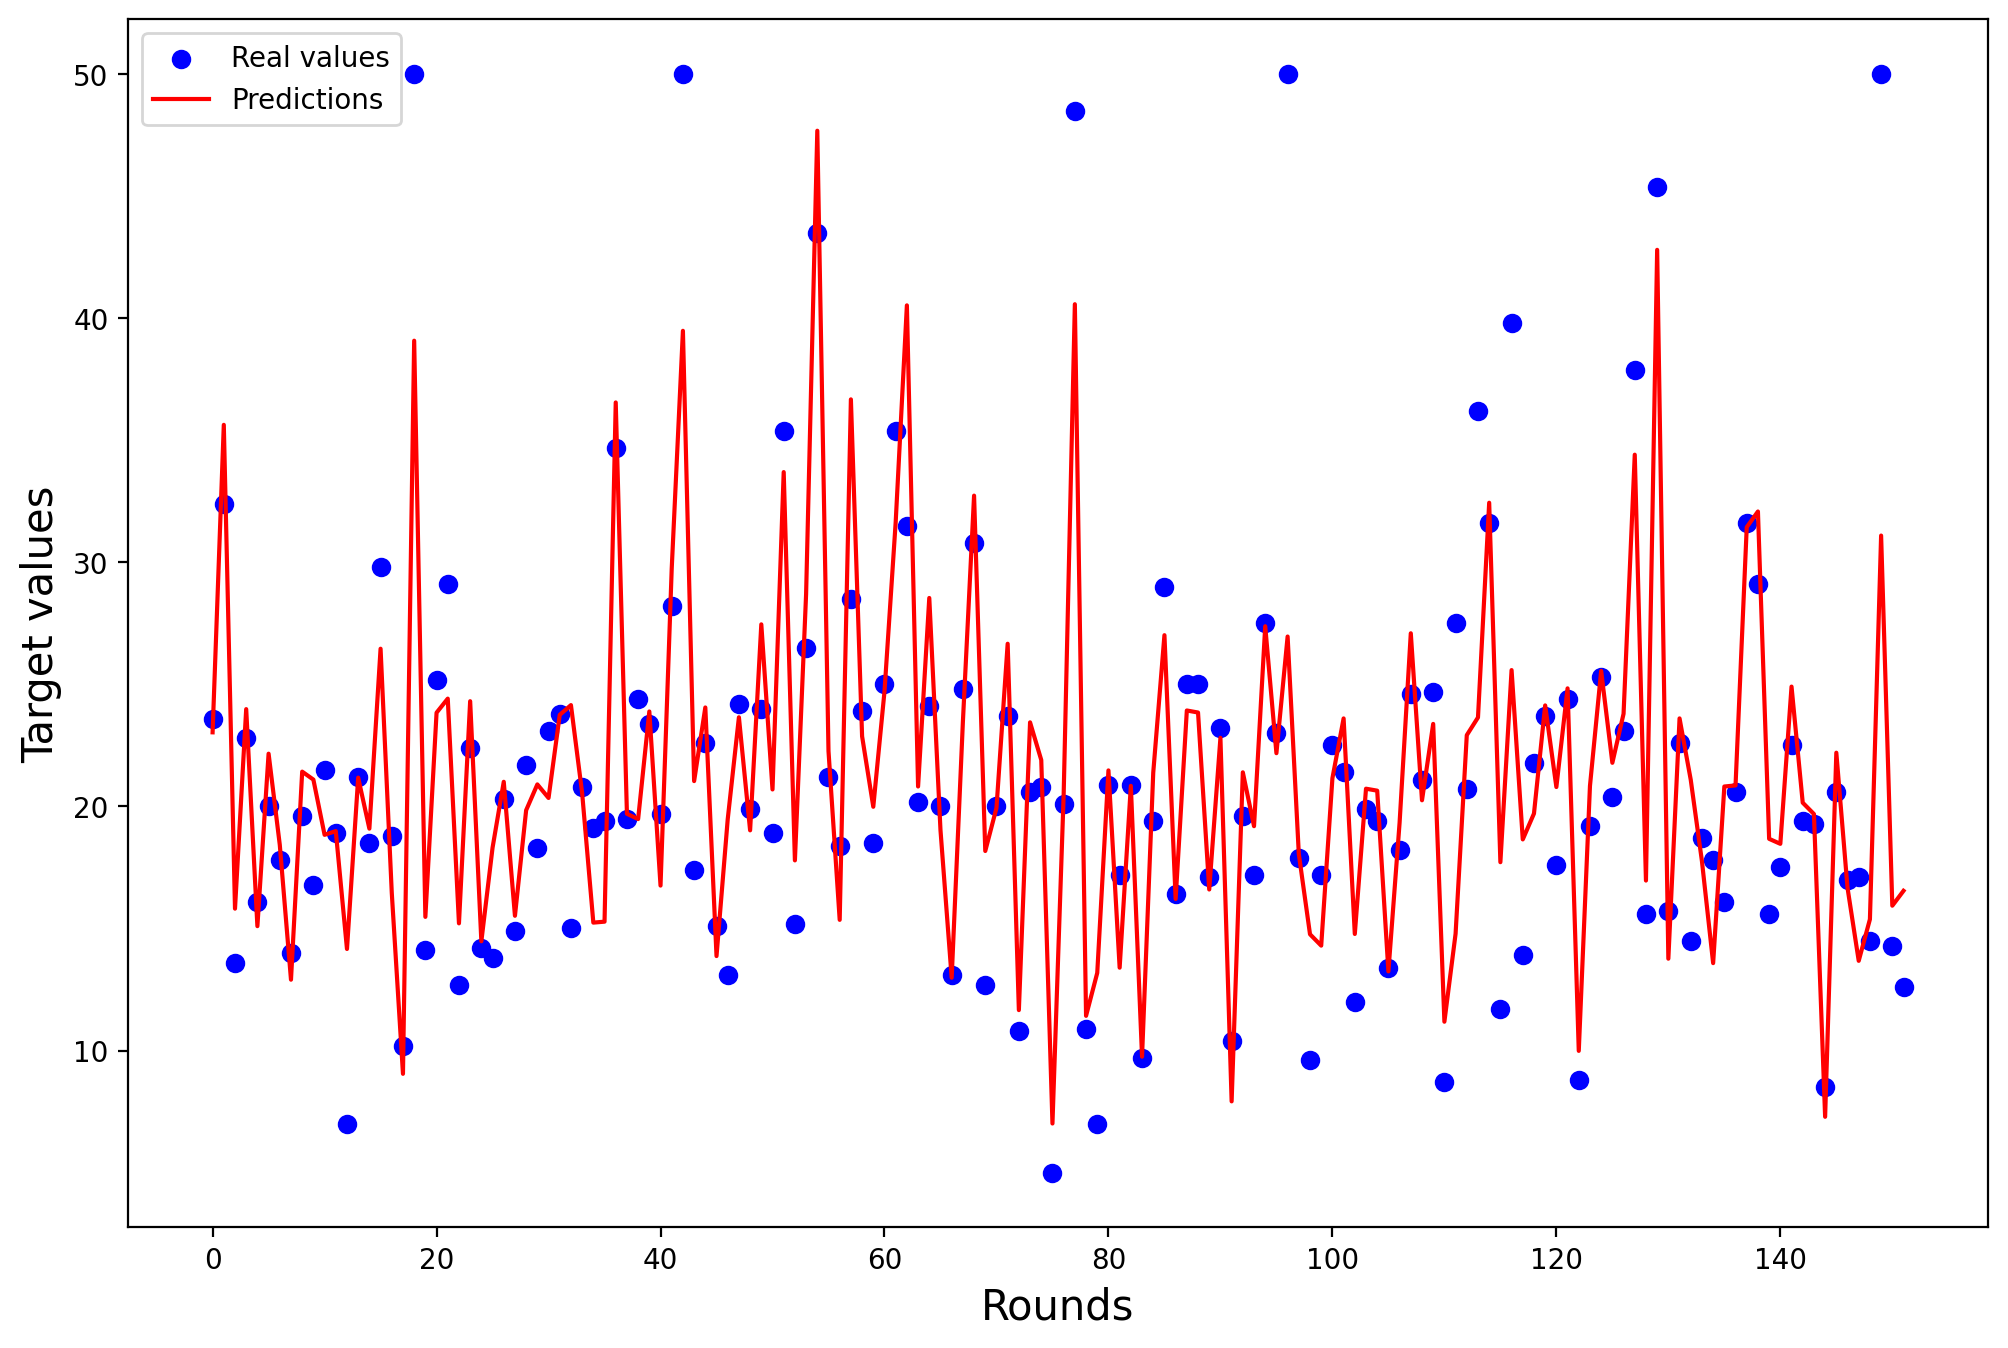

In [104]:
plt.figure(figsize=(12, 8), dpi = 200)
plt.scatter(Y.index, Y, color = 'blue',label = 'Real values')
plt.plot(p.index,p.data, color = 'red',label = 'Predictions')
plt.xlabel('Rounds', fontsize = 15)
plt.ylabel('Target values', fontsize = 15)
plt.legend()
plt.savefig('Predictions.png')